# 자연어 처리 전처리 이해하기 ft.Torchtext

- Tip: google colab에서 pip install한 긴 결과물이 안나오게 하고 싶으면 &> /dev/null를 설치 커멘드 뒤에 붙여주기만 하면 됩니다

### 토큰화 -> 단어 집합 생성 -> 정수 인코딩 -> 패딩 -> 벡터화
- 토큰화: 주어진 텍스트를 단어 또는 문자 단위로 자르는 것

### Split

In [ ]:
text = """Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think
that they can change the world, are the ones who do."""

In [ ]:
print(text.split(),end='')

['Here’s', 'to', 'the', 'crazy', 'ones,', 'the', 'misfits,', 'the', 'rebels,', 'the', 'troublemakers,', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes.', 'The', 'ones', 'who', 'see', 'things', 'differently', '—', 'they’re', 'not', 'fond', 'of', 'rules.', 'You', 'can', 'quote', 'them,', 'disagree', 'with', 'them,', 'glorify', 'or', 'vilify', 'them,', 'but', 'the', 'only', 'thing', 'you', 'can’t', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things.', 'They', 'push', 'the', 'human', 'race', 'forward,', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones,', 'we', 'see', 'genius,', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world,', 'are', 'the', 'ones', 'who', 'do.']

### NLTK

In [ ]:
!pip install nltk&> /dev/null

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text),end='')

['Here', '’', 's', 'to', 'the', 'crazy', 'ones', ',', 'the', 'misfits', ',', 'the', 'rebels', ',', 'the', 'troublemakers', ',', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', '.', 'The', 'ones', 'who', 'see', 'things', 'differently', '—', 'they', '’', 're', 'not', 'fond', 'of', 'rules', '.', 'You', 'can', 'quote', 'them', ',', 'disagree', 'with', 'them', ',', 'glorify', 'or', 'vilify', 'them', ',', 'but', 'the', 'only', 'thing', 'you', 'can', '’', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', '.', 'They', 'push', 'the', 'human', 'race', 'forward', ',', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', ',', 'we', 'see', 'genius', ',', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', ',', 'are', 'the', 'ones', 'who', 'do', '.']

- large corpus일 경우에는 sklearn이 이전 것보다 더 활용적 -> corpus: collection of texts(말뭉치)

### Sklearn

In [ ]:
!pip install pandas&> /dev/null

In [ ]:
import pandas as pd
texts = [
"""Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.""" ,
 
'I choose a lazy person to do a hard job. Because a lazy person will find an easy way to do it.'
]
df = pd.DataFrame({'author': ['jobs', 'gates'], 'text':texts})

In [ ]:
df

,author,text
0,jobs,"Here’s to the crazy ones, the misfits, the reb..."
1,gates,I choose a lazy person to do a hard job. Becau...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text']) #term-document matrix생성 
#The number of times a term appeared in the document represented by the row of the matrix
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['author'].values, columns=cv.get_feature_names())

In [ ]:
df_dtm

,change,choose,crazy,differently,disagree,easy,fond,forward,genius,glorify,hard,holes,human,ignore,job,lazy,misfits,ones,pegs,person,push,quote,race,rebels,round,rules,square,thing,things,think,troublemakers,vilify,way,world
jobs,2,0,3,1,1,0,1,1,1,1,0,1,1,1,0,0,1,5,1,0,1,1,1,1,1,1,1,1,2,1,1,1,0,1
gates,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### spaCy 3.0

In [ ]:
!pip install spacy&> /dev/null

In [ ]:
from spacy.lang.es import Spanish
nlp = Spanish()

text_spanish = """Por los locos. Los marginados. Los rebeldes. Los problematicos. 
Los inadaptados. Los que ven las cosas de una manera distinta. A los que no les gustan
las reglas. Y a los que no respetan el “status quo”. Puedes citarlos, discrepar de ellos,
ensalzarlos o vilipendiarlos. Pero lo que no puedes hacer es ignorarlos… Porque ellos
cambian las cosas, empujan hacia adelante la raza humana y, aunque algunos puedan
considerarlos locos, nosotros vemos en ellos a genios. Porque las personas que están
lo bastante locas como para creer que pueden cambiar el mundo, son las que lo logran."""

doc = nlp(text_spanish)

tokens = [token.text for token in doc]
print(tokens)

['Por', 'los', 'locos', '.', 'Los', 'marginados', '.', 'Los', 'rebeldes', '.', 'Los', 'problematicos', '.', '\n', 'Los', 'inadaptados', '.', 'Los', 'que', 'ven', 'las', 'cosas', 'de', 'una', 'manera', 'distinta', '.', 'A', 'los', 'que', 'no', 'les', 'gustan', '\n', 'las', 'reglas', '.', 'Y', 'a', 'los', 'que', 'no', 'respetan', 'el', '“', 'status', 'quo', '”', '.', 'Puedes', 'citarlos', ',', 'discrepar', 'de', 'ellos', ',', '\n', 'ensalzarlos', 'o', 'vilipendiarlos', '.', 'Pero', 'lo', 'que', 'no', 'puedes', 'hacer', 'es', 'ignorarlos', '…', 'Porque', 'ellos', '\n', 'cambian', 'las', 'cosas', ',', 'empujan', 'hacia', 'adelante', 'la', 'raza', 'humana', 'y', ',', 'aunque', 'algunos', 'puedan', '\n', 'considerarlos', 'locos', ',', 'nosotros', 'vemos', 'en', 'ellos', 'a', 'genios', '.', 'Porque', 'las', 'personas', 'que', 'están', '\n', 'lo', 'bastante', 'locas', 'como', 'para', 'creer', 'que', 'pueden', 'cambiar', 'el', 'mundo', ',', 'son', 'las', 'que', 'lo', 'logran', '.']


In [ ]:
from spacy.lang.en import English
nlp = English()

text_english = """But soon after the PATRIOT Act passed, a few years before I even arrived here in the Senate, I began hearing concerns from people of every background and political leaning that this law, the very purpose of which was to protect us, was also threatening to violate some of the rights and freedoms that we hold most dear; that it didn't just provide law enforcement the powers it needed to keep us safe but powers that it didn't need to invade our privacy without cause or suspicion."""

doc = nlp(text_english)

tokens = [token.text for token in doc]
print(tokens)

['But', 'soon', 'after', 'the', 'PATRIOT', 'Act', 'passed', ',', 'a', 'few', 'years', 'before', 'I', 'even', 'arrived', 'here', 'in', 'the', 'Senate', ',', 'I', 'began', 'hearing', 'concerns', 'from', 'people', 'of', 'every', 'background', 'and', 'political', 'leaning', 'that', 'this', 'law', ',', 'the', 'very', 'purpose', 'of', 'which', 'was', 'to', 'protect', 'us', ',', 'was', 'also', 'threatening', 'to', 'violate', 'some', 'of', 'the', 'rights', 'and', 'freedoms', 'that', 'we', 'hold', 'most', 'dear', ';', 'that', 'it', 'did', "n't", 'just', 'provide', 'law', 'enforcement', 'the', 'powers', 'it', 'needed', 'to', 'keep', 'us', 'safe', 'but', 'powers', 'that', 'it', 'did', "n't", 'need', 'to', 'invade', 'our', 'privacy', 'without', 'cause', 'or', 'suspicion', '.']


### spaCy 2.0

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms"

In [ ]:
import spacy
spacy_en = spacy.load('en')

def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### Genism

- unsupervised topic modeling
- natural language processing
- also contains a tokenizer

In [ ]:
!pip install gensim&> /dev/null

In [ ]:
from gensim.utils import tokenize
tokenized = list(tokenize(text))
print(tokenized,end='')

['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']

### Conclusion

- split() : apostrophe (") and comma (,)는 토큰으로 구분 x
- nltk(word_tokenize) : apostrophe (") and comma (,) 토큰으로 구분 o
- spaCy : considers puncuation symbols as a separate token(\n 새로운 줄도)
- genism - splits every time it encounters a punctuation symobl

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh&> /dev/null

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab


In [ ]:
!pip install konlpy&> /dev/null

### KoNLPy: 한국어 자연어 처리
- KoNLPy를 통해 활용할 수 있는 형태소 분석기
  - okt(Open Korea Text)
  - **Mecab** 
  - Komoran
  - Hannanum (한나눔)
  - Kkma (꼬꼬마)

- KoNLPy: 형태소 분석기에서 공통적으로 쓰이는 메소드
  - morphs: 형태소 추출
  - pos: 품사 태깅
  - nouns: 명사 추출

영어와 비교해 한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되서 단어 집합(vocabulary)의 크기가 불필요하게 커진다.
- '사과가' , '사과를' , '사과와' , '사과는' 같은 단어임에도 다른 단어로 인식

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [ ]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


# 단어 집합(Vocab) 생성

In [ ]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') 
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print(f'전체 샘플의 수 {len(data)}')

전체 샘플의 수 200000


In [ ]:
sample_data = data[:100]

In [ ]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


### 불용어를 제거하기 위해 불용어 정의

In [ ]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
tokenizer = Mecab()

tokenized = []
for sentence in sample_data['document']:
  temp = tokenizer.morphs(sentence) # tokenize
  temp = [word for word in temp if not word in stopwords] # 불용어 제거
  tokenized.append(temp)

In [ ]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [ ]:
#빈도수 계산 도구 FreqDist
vocab = FreqDist(np.hstack(tokenized))
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 664


In [ ]:
#단어를 key로, 단어에 대한 빈도수가 value로 저장. vocab에 단어를 입력하면 빈도수를 리턴
vocab['때']

7

In [ ]:
#상위 빈도수인 단어 500개
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print(f'단어 집합의 크기 {len(vocab)}')

단어 집합의 크기 500


### 각 단어에 고유한 정수 부여

### 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)
- 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧은 샘플들에 'pad'토큰을 추가하여 길이를 맞춰주는 작업

In [ ]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1 
#pad - max length of the sequence is 8, then my name is dfjkajoe;kdf -> my name is dfjkajoe;kdf _pad_ _pad_ _pad_ _pad_
word_to_index['unk'] = 0 
#unk - unknown token -'used to replace the rare words' ex) my name is 10312u09jkdlas -> my name is _unk_

encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
  temp = []
  for w in line: #각 줄에서 1개씩 글자를 읽음
    try:
      temp.append(word_to_index[w]) #글자를 해당되는 정수로 변환
    except KeyError: #단어 집합에 없는 단어일 경우 unk로 대체됨
      temp.append(word_to_index['unk']) #unk의 인덱스로 변환

  encoded.append(temp)

In [ ]:
print(encoded[:10],end='')

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [44, 33, 120, 210, 211, 212, 213, 68, 45, 34, 13, 214, 121, 15, 2, 215, 69, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3], [125, 37, 221, 41, 79, 37], [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


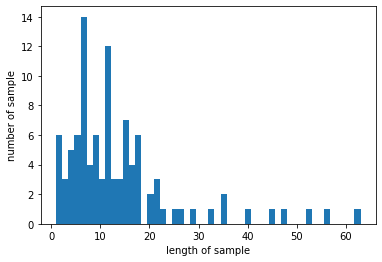

In [ ]:
max_len = max(len(l) for l in encoded)
print(f'리뷰의 최대 길이 : {max_len}') #벡터의 개수
print(f'리뷰의 최소 길이 : {min(len(l) for l in encoded)}')
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [ ]:
#가장 긴 리뷰 길이 63으로 통일

for line in encoded:
  if len(line) < max_len: #현재 샘플이 정해준 길이보다 짧으면
    line += [word_to_index['pad']] * (max_len - len(line)) #나머지는 전부 'pad' 토큰으로 채운다. 

In [ ]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000


In [ ]:
print(encoded[:3])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
